In [1]:
"""
Created on Sat Nov 25 10:36:43 2023

@author: Rebecca Tobin
"""

'\nCreated on Sat Nov 25 10:36:43 2023\n\n@author: Rebecca Tobin\n'

In [10]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [4]:
R1 = pd.read_csv('../data/raw/R1_train.csv') 
R1 = (np.array(R1))[0:1000,:]
R2 = pd.read_csv('../data/raw/R2_train.csv') 
R2 = (np.array(R2))[0:1000,:]
R3 = pd.read_csv('../data/raw/R3_train.csv') 
R3 = (np.array(R3))[0:1000,:]
R4 = pd.read_csv('../data/raw/R4_train.csv') 
R4 = (np.array(R4))[0:1000,:]
R5 = pd.read_csv('../data/raw/R5_train.csv') 
R5 = (np.array(R5))[0:1000,:]
R6 = pd.read_csv('../data/raw/R6_train.csv') 
R6 = (np.array(R6))[0:1000,:]

y = pd.read_csv('../data/raw/labels_train.csv') 
y = (np.array(y))[0:1000,:]

# Will need to normalize the data, I think

In [5]:
# How many unique rows of y are there?

# Data frame of the unique rows
unique_rows_y = y.drop_duplicates()
# Adding a unique identifier to each unique row
unique_rows_y["identifier"] = np.arange(len(unique_rows_y))

# finding the unique identifier for each row in y
y_wid = pd.merge(y, unique_rows_y, how='left', 
                 on=['0','1','2','3','4','5','6','7','8','9','10','11','12','13',
                     '14','15','16','17','18'])

# Number of instances that each unique row occurs
unique_rows_y_counts = pd.DataFrame((y_wid['identifier']).value_counts())
plt.figure()
plt.hist(unique_rows_y_counts['count'], bins = 30, log = True)
plt.ylabel('Count')
plt.xlabel('Number of repetitions of a unique set of labels')
plt.show()

# Number of rows with a certain number of repetitions
num_repetitions = pd.DataFrame((unique_rows_y_counts['count']).value_counts())
print("Top 10 most common number of repetitions of a unique set of labels")
print(num_repetitions.loc[1:11])

del(unique_rows_y,y_wid,unique_rows_y_counts,num_repetitions)

AttributeError: 'numpy.ndarray' object has no attribute 'drop_duplicates'

In [6]:
def proba_mass_split(y, folds=10):
    # add shuffle?
    y = np.array(y)
    obs, classes = y.shape
    dist = y.sum(axis=0).astype('float')
    dist /= dist.sum()
    dist = np.array(dist)
    index_list = []
    fold_dist = np.zeros((folds, classes), dtype='float')
    for _ in range(folds):
        index_list.append([])
    for i in range(obs):
        # add one obs to each fold so that each fold has one obs
        if i < folds:
            target_fold = i
        # once each fold has one observation, do this
        else:
            normed_folds = fold_dist.T / fold_dist.sum(axis=1)
            # how off is the ditribution of each fold from the desired distribution
            how_off = normed_folds.T - dist
            # find the fold that minimizing the dot product to decide where 
            # to put the ith observation
            target_fold = np.argmin(np.dot((y[i] - .5).reshape(1, -1), how_off.T))
        # keep track of how adding y[i] to the fold changes the distribution
        fold_dist[target_fold] += y[i]
        # add y[i] to the index list for the chosen fold
        index_list[target_fold].append(i)
    
    return fold_dist, dist, index_list

fold_dist, dist, index_list = proba_mass_split(y)

Number of obs. in fold 1: 113
Number of obs. in fold 2: 109
Number of obs. in fold 3: 75
Number of obs. in fold 4: 82
Number of obs. in fold 5: 117
Number of obs. in fold 6: 83
Number of obs. in fold 7: 121
Number of obs. in fold 8: 117
Number of obs. in fold 9: 97
Number of obs. in fold 10: 86


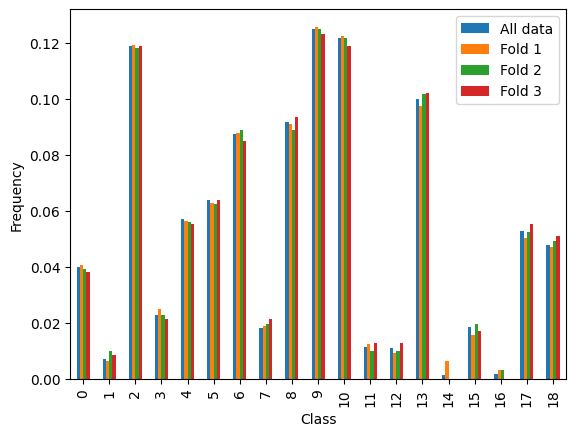

In [7]:
normed_folds = fold_dist.T/fold_dist.sum(axis=1)
class_list = (np.arange(19)).astype(str)

data = {'All data': dist,
        'Fold 1': normed_folds[:,0],
        'Fold 2': normed_folds[:,1],
        'Fold 3': normed_folds[:,2]}

data = pd.DataFrame(data, columns=['All data', 'Fold 1', 'Fold 2', 'Fold 3'], 
                    index = class_list)

# Multiple bar chart
data.plot.bar(xlabel = 'Class', ylabel = 'Frequency')

for j in range(len(index_list)):
    len_index_list = len(index_list[j])
    print(f"Number of obs. in fold {j+1}: {len_index_list}")

# Code modified from 
# https://stats.stackexchange.com/questions/65828/how-to-use-scikit-learns-cross-validation-functions-on-multi-label-classifiers
# To to self: remember to cite

In [11]:
# For each R file (each subset of features)

# For each fold
for i in range(10):
    train_index = []
    for j in range(10):
        if j != i:
            train_index.append(index_list[j])
    
    y_train = y[:,:]

clf = MLPClassifier(solver = 'adam', activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(0))
skf = StratifiedKFold(n_splits = 10, shuffle = True)

for i, (train_index, test_index) in enumerate(skf.split(R1, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    clf.fit(R1, y)
    

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [9]:
CV_score = cross_val_score(clf, X_train, y_train, cv = CV)
CV_scores.append(CV_score)
mean_CV_scores.append(CV_score.mean())
std_CV_scores.append(CV_score.std())

NameError: name 'cross_val_score' is not defined